In [1]:
# libraries

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving suicidal_tendency.csv to suicidal_tendency.csv


In [ ]:
# Let’s read dataset.

df = pd.read_csv('suicidal_tendency.csv')
df.head()

,tweet,tendency
0,my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge t...,1
1,muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of ...,1
2,work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy ...,1
3,i did something on the 2 of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say...,1
4,i feel like no one cares i just want to die maybe then i d feel less lonely,1


#### Data Inspection

In [ ]:
df.shape

(9119, 2)

In [ ]:
df.tendency.value_counts()


0    5121
1    3998
Name: tendency, dtype: int64

In [ ]:
# defining function to remove unwanted text patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
# Removing twitter handler
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,tweet,tendency
0,my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge t...,1
1,muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of ...,1
2,work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy ...,1
3,i did something on the 2 of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say...,1
4,i feel like no one cares i just want to die maybe then i d feel less lonely,1


In [ ]:
# Removing Punctuations, Numbers, and Special Characters
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,tweet,tendency
0,my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge t...,1
1,muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of ...,1
2,work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy ...,1
3,i did something on the of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say...,1
4,i feel like no one cares i just want to die maybe then i d feel less lonely,1


In [ ]:
# Lower case the data
df["tweet"] = df["tweet"].str.lower()
df.head()

,tweet,tendency
0,my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge t...,1
1,muttering i wanna die to myself daily for a few months now i feel worthless shes my soulmate i cant live in this horrible world without her i am so lonely i wish i could just turn off the part of ...,1
2,work slave i really feel like my only purpose in life is to make a higher man money parents forcing me through college and i have too much on my plate i owe a lot of money i know this is the easy ...,1
3,i did something on the of october i overdosed i just felt so alone and horrible i was in hospital for two days now when i walk down the hallways of my school they always look at me weird and say...,1
4,i feel like no one cares i just want to die maybe then i d feel less lonely,1


In [ ]:
# Remove Stop Words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["tweet"] = df["tweet"].apply(lambda text: remove_stopwords(text))
df.head()


,tweet,tendency
0,life meaningless want end life badly life completely empty dont want create meaning creating meaning pain long hold back urge run car head first next person coming opposite way stop feeling jealou...,1
1,muttering wanna die daily months feel worthless shes soulmate cant live horrible world without lonely wish could turn part brain feels,1
2,work slave really feel like purpose life make higher man money parents forcing college much plate owe lot money know easy way really tired issues top dealing tensions america well want rest,1
3,something october overdosed felt alone horrible hospital two days walk hallways school always look weird say take pills hate one voice head wont go away cant anymore thanks reading,1
4,feel like one cares want die maybe feel less lonely,1


In [ ]:
# Tokenizing tweets 
tokenized_tweet = df['tweet'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0    [life, meaningless, want, end, life, badly, life, completely, empty, dont, want, create, meaning, creating, meaning, pain, long, hold, back, urge, run, car, head, first, next, person, coming, oppo...
1                                               [muttering, wanna, die, daily, months, feel, worthless, shes, soulmate, cant, live, horrible, world, without, lonely, wish, could, turn, part, brain, feels]
2    [work, slave, really, feel, like, purpose, life, make, higher, man, money, parents, forcing, college, much, plate, owe, lot, money, know, easy, way, really, tired, issues, top, dealing, tensions, ...
3    [something, october, overdosed, felt, alone, horrible, hospital, two, days, walk, hallways, school, always, look, weird, say, take, pills, hate, one, voice, head, wont, go, away, cant, anymore, th...
4                                                                                                                                             [feel, like, one, cares, want, die, ma

In [ ]:
# normalize the tokenized tweets.

from nltk.stem.porter import *
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [life, meaningless, want, end, life, badli, life, complet, empti, dont, want, creat, mean, creat, mean, pain, long, hold, back, urg, run, car, head, first, next, person, come, opposit, way, stop, ...
1                                                         [mutter, wanna, die, daili, month, feel, worthless, she, soulmat, cant, live, horribl, world, without, lone, wish, could, turn, part, brain, feel]
2    [work, slave, realli, feel, like, purpos, life, make, higher, man, money, parent, forc, colleg, much, plate, owe, lot, money, know, easi, way, realli, tire, issu, top, deal, tension, america, well...
3              [someth, octob, overdos, felt, alon, horribl, hospit, two, day, walk, hallway, school, alway, look, weird, say, take, pill, hate, one, voic, head, wont, go, away, cant, anymor, thank, read]
4                                                                                                                                                 [feel, like, one, care, want, die,

In [ ]:
# join tokens back together.

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['tweet'] = tokenized_tweet
df.head()

,tweet,tendency
0,life meaningless want end life badli life complet empti dont want creat mean creat mean pain long hold back urg run car head first next person come opposit way stop feel jealou tragic charact like...,1
1,mutter wanna die daili month feel worthless she soulmat cant live horribl world without lone wish could turn part brain feel,1
2,work slave realli feel like purpos life make higher man money parent forc colleg much plate owe lot money know easi way realli tire issu top deal tension america well want rest,1
3,someth octob overdos felt alon horribl hospit two day walk hallway school alway look weird say take pill hate one voic head wont go away cant anymor thank read,1
4,feel like one care want die mayb feel less lone,1


In [ ]:
# Understanding the common words
all_words = ' '.join([text for text in df['tweet']])

In [ ]:
from wordcloud import WordCloud

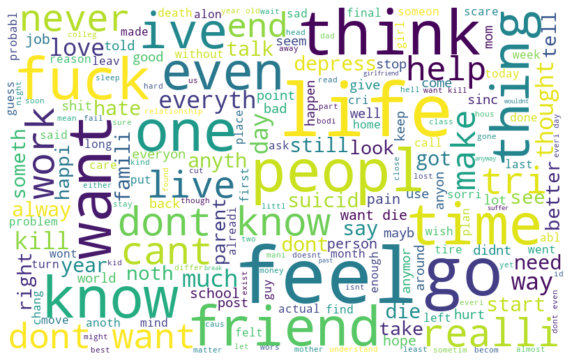

In [ ]:
# Words in suicidial tweets
suicidal_words = " ".join([text for text in df['tweet'][df['tendency'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, background_color = "white", random_state = 21, 
                      max_font_size = 110).generate(suicidal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

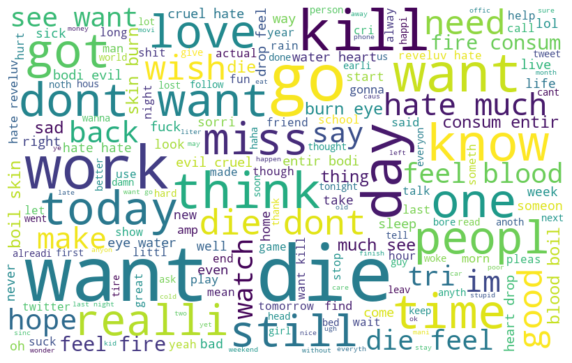

In [ ]:
# Words in non suicidial tweets
nonsuicidal_words = " ".join([text for text in df['tweet'][df['tendency'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, background_color = "white", random_state = 21, 
                      max_font_size = 110).generate(nonsuicidal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Bag-of-Words Features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df= 0.90, min_df= 2,max_features=10000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tweet'])
bow.shape

(9119, 7370)

In [ ]:
df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['tweet'])
tfidf.shape

(9119, 7370)

In [ ]:
df_tfidf = pd.DataFrame(tfidf.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Word2Vec Features
%%time

tokenized_tweet = df['tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(df['tweet']), epochs=20)

CPU times: user 2min 29s, sys: 402 ms, total: 2min 30s
Wall time: 1min 17s


In [ ]:
# check its performance
model_w2v.wv.most_similar(positive= 'die')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('want', 0.6433640122413635),
 ('ene', 0.5910110473632812),
 ('orbit', 0.5737514495849609),
 ('nevi', 0.5642461776733398),
 ('notexist', 0.5606217384338379),
 ('schlanni', 0.5566993951797485),
 ('yuta', 0.5546751022338867),
 ('weeb', 0.5533937215805054),
 ('rlli', 0.5503016710281372),
 ('hq', 0.5467437505722046)]

In [ ]:
model_w2v.wv.most_similar(positive = 'life')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('opt', 0.6342637538909912),
 ('ought', 0.6303662061691284),
 ('gamei', 0.624470591545105),
 ('dienoth', 0.6176820397377014),
 ('fullest', 0.6085463166236877),
 ('certainti', 0.5998404622077942),
 ('wana', 0.5956401228904724),
 ('galaxi', 0.5954653024673462),
 ('pointto', 0.5917888879776001),
 ('humanli', 0.5888633728027344)]

In [ ]:
# lets see vector representaion
model_w2v['die']

array([ 6.73202127e-02,  9.98069644e-02, -1.39982805e-01, -2.28732169e-01,
        3.84364799e-02,  2.48766676e-01, -1.13312483e-01,  6.32701516e-02,
       -9.30719599e-02, -6.79364204e-02,  8.63252506e-02,  1.36051208e-01,
       -1.19587697e-01, -7.77487978e-02, -1.56353742e-01, -1.87289014e-01,
       -1.27231494e-01, -1.26461402e-01, -3.63101155e-01, -5.69178946e-02,
       -1.67527854e-01,  4.58048254e-01,  5.69032952e-02,  3.56447250e-01,
        1.07469194e-01,  3.23386133e-01, -1.43223763e-01, -1.58565849e-01,
       -5.00233062e-02, -5.55238724e-01,  2.73321599e-01, -2.20858186e-01,
        1.03835285e-01, -1.06447332e-01,  1.20205954e-02,  5.22119701e-02,
       -1.29084736e-01, -8.67233723e-02,  1.62755493e-02,  2.32299678e-02,
        1.04327336e-01,  3.17448020e-01,  1.93232432e-01,  4.02101353e-02,
        4.88437973e-02, -5.69907250e-03,  2.30170488e-01,  1.88396409e-01,
       -2.53276706e-01, -1.37446240e-01, -2.61515100e-02,  1.52488336e-01,
       -4.66603637e-02,  

In [ ]:
len(model_w2v['die']) #The length of the vector is 200

200

In [ ]:
# Preparing Vectors for Tweets
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
        except KeyError:
            continue
    if count != 0: 
        vec /= count
    return vec

In [ ]:
# word2vec
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(9119, 200)

In [ ]:
# Doc2Vec Embedding
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets = add_label(tokenized_tweet)

In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['life', 'meaningless', 'want', 'end', 'life', 'badli', 'life', 'complet', 'empti', 'dont', 'want', 'creat', 'mean', 'creat', 'mean', 'pain', 'long', 'hold', 'back', 'urg', 'run', 'car', 'head', 'first', 'next', 'person', 'come', 'opposit', 'way', 'stop', 'feel', 'jealou', 'tragic', 'charact', 'like', 'gomer', 'pile', 'swift', 'end', 'abl', 'bring', 'live'], tags=['tweet_0']),
 LabeledSentence(words=['mutter', 'wanna', 'die', 'daili', 'month', 'feel', 'worthless', 'she', 'soulmat', 'cant', 'live', 'horribl', 'world', 'without', 'lone', 'wish', 'could', 'turn', 'part', 'brain', 'feel'], tags=['tweet_1']),
 LabeledSentence(words=['work', 'slave', 'realli', 'feel', 'like', 'purpos', 'life', 'make', 'higher', 'man', 'money', 'parent', 'forc', 'colleg', 'much', 'plate', 'owe', 'lot', 'money', 'know', 'easi', 'way', 'realli', 'tire', 'issu', 'top', 'deal', 'tension', 'america', 'well', 'want', 'rest'], tags=['tweet_2']),
 LabeledSentence(words=['someth', 'octob', 'over

In [ ]:
# train a doc2vec model.
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, 
                                  dm_mean = 1, 
                                  size = 200, 
                                  window = 5, 
                                  negative = 7, 
                                  min_counts = 5, 
                                  workers = 3, 
                                  alpha = 0.1, 
                                  seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples = len(df['tweet']), epochs = 15)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 9119/9119 [00:00<00:00, 1565994.85it/s]


CPU times: user 34 s, sys: 2.96 s, total: 37 s
Wall time: 23.8 s


In [ ]:
# Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(df)):
    docvec_arrays[i, :] = model_d2v.docvecs[i].reshape((1, 200))
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(9119, 200)

In [ ]:
# Logistic Regression using BOW
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
# Split dataset 
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow, df['tendency'], test_size=0.2)
print (X_train_bow.shape, y_train.shape)
print (X_test_bow.shape, y_test.shape)

(7295, 7370) (7295,)
(1824, 7370) (1824,)


In [ ]:
# fit a LR model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test_bow)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1079
           1       0.89      0.86      0.88       745

    accuracy                           0.90      1824
   macro avg       0.90      0.90      0.90      1824
weighted avg       0.90      0.90      0.90      1824



In [ ]:
# Logistic regression (TF-IDF Features)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf, df['tendency'], test_size=0.2)
print (X_train_tfidf.shape, y_train.shape)
print (X_test_tfidf.shape, y_test.shape)

(7295, 7370) (7295,)
(1824, 7370) (1824,)


In [ ]:
tfidf_regmodel = LogisticRegression(class_weight="balanced")
tfidf_regmodel.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = tfidf_regmodel.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1050
           1       0.91      0.85      0.88       774

    accuracy                           0.90      1824
   macro avg       0.90      0.89      0.90      1824
weighted avg       0.90      0.90      0.90      1824



**Word2Vec Features**

In [ ]:
# Logistic regression (Word2Vec Features)
X_train_wvec, X_test_wvec, y_train, y_test = train_test_split(wordvec_df, df['tendency'], test_size=0.2)
print (X_train_wvec.shape, y_train.shape)
print (X_test_wvec.shape, y_test.shape)

(7295, 200) (7295,)
(1824, 200) (1824,)


In [ ]:
wordvec_regmodel = LogisticRegression(max_iter=1000)
wordvec_regmodel.fit(X_train_wvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = wordvec_regmodel.predict(X_test_wvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1020
           1       0.94      0.84      0.89       804

    accuracy                           0.91      1824
   macro avg       0.91      0.90      0.90      1824
weighted avg       0.91      0.91      0.90      1824



In [ ]:
# Logistic Regression (Doc2Vec Features)
X_train_docvec, X_test_docvec, y_train, y_test = train_test_split(docvec_df, df['tendency'], test_size=0.2)
print (X_train_docvec.shape, y_train.shape)
print (X_test_docvec.shape, y_test.shape)

(7295, 200) (7295,)
(1824, 200) (1824,)


In [ ]:
docvec_regmodel = LogisticRegression(max_iter=1000)
docvec_regmodel.fit(X_train_docvec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = docvec_regmodel.predict(X_test_docvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1055
           1       0.87      0.83      0.85       769

    accuracy                           0.87      1824
   macro avg       0.87      0.87      0.87      1824
weighted avg       0.87      0.87      0.87      1824



In [ ]:
# Support Vector Machine (SVM) BOW
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', C = 1, probability = True)

In [ ]:
BOW_clf= SVC()
BOW_clf.fit(X_train_bow, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = BOW_clf.predict(X_test_bow)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73      1055
           1       0.61      0.01      0.03       769

    accuracy                           0.58      1824
   macro avg       0.60      0.50      0.38      1824
weighted avg       0.59      0.58      0.44      1824



In [ ]:
# SVM (TF-IDF Features)
TFIDF_clf= SVC()
TFIDF_clf.fit(X_train_tfidf, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = TFIDF_clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1055
           1       0.41      0.16      0.23       769

    accuracy                           0.55      1824
   macro avg       0.49      0.50      0.46      1824
weighted avg       0.51      0.55      0.49      1824



In [ ]:
# SVM (Word2Vec Features)
WVEC_clf= SVC()
WVEC_clf.fit(X_train_wvec, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = WVEC_clf.predict(X_test_wvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.97      0.72      1055
           1       0.37      0.02      0.04       769

    accuracy                           0.57      1824
   macro avg       0.47      0.50      0.38      1824
weighted avg       0.49      0.57      0.44      1824



In [ ]:
# SVM (Doc2Vec Features)
DOCVEC_clf= SVC()
DOCVEC_clf.fit(X_train_docvec, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = DOCVEC_clf.predict(X_test_docvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1055
           1       0.94      0.84      0.88       769

    accuracy                           0.91      1824
   macro avg       0.91      0.90      0.90      1824
weighted avg       0.91      0.91      0.91      1824



In [ ]:
# RF (BOW)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400, random_state = 11)

In [ ]:
rf.fit(X_train_bow, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test_bow)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63      1055
           1       0.42      0.30      0.35       769

    accuracy                           0.53      1824
   macro avg       0.50      0.50      0.49      1824
weighted avg       0.51      0.53      0.51      1824



In [ ]:
# RF (TF-IDF Features)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68      1055
           1       0.43      0.20      0.27       769

    accuracy                           0.55      1824
   macro avg       0.51      0.50      0.48      1824
weighted avg       0.52      0.55      0.51      1824



In [ ]:
# RF (Word2Vec Features)
rf.fit(X_train_wvec, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test_wvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69      1055
           1       0.37      0.11      0.17       769

    accuracy                           0.54      1824
   macro avg       0.47      0.49      0.43      1824
weighted avg       0.49      0.54      0.47      1824



In [ ]:
# Doc2Vec Features
rf.fit(X_train_docvec, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(X_test_docvec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1055
           1       0.87      0.85      0.86       769

    accuracy                           0.88      1824
   macro avg       0.88      0.88      0.88      1824
weighted avg       0.88      0.88      0.88      1824

